# Removing Outliers using percentile (quantile)

Use this air bnb new york city data set and remove outliers using percentile based on price per night for a given apartment/home. You can use suitable upper and lower limits on percentile based on your intuition. Your goal is to come up with new pandas dataframe that doesn't have the outliers present in it.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv('AB_NYC_2019.csv')
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df1.shape

(48895, 16)

In [4]:
df1.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
df1.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
df1.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [7]:
max_thershold,min_thershold = df1.price.quantile([0.999,0.01])
max_thershold,min_thershold

(3000.0, 30.0)

In [8]:
df2=df1[(df1.price > min_thershold)& (df1.price < max_thershold)]
df2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
df2.shape

(48183, 16)

In [10]:
df2.price.describe()

count    48183.000000
mean       148.772036
std        153.594795
min         31.000000
25%         70.000000
50%        110.000000
75%        179.000000
max       2999.000000
Name: price, dtype: float64

# Removing Outliers using Z-Scores and Standard deviation

Exercise
You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [11]:
df=pd.read_csv('bhp.csv')

In [12]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [13]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [14]:
df.shape

(13200, 7)

In [16]:
max_tshld,min_tshld = df.price_per_sqft.quantile([0.999,0.001])
max_tshld,min_tshld

(50959.36200000099, 1366.184)

In [17]:
new_df = df[(df.price_per_sqft < max_tshld) & (df.price_per_sqft > min_tshld)]
new_df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [18]:
new_df.shape

(13172, 7)

In [21]:
df.shape[0]-new_df.shape[0]

28

In [23]:
new_df.price_per_sqft.describe()

count    13172.000000
mean      6663.653735
std       4141.020700
min       1379.000000
25%       4271.000000
50%       5438.000000
75%       7311.000000
max      50349.000000
Name: price_per_sqft, dtype: float64

In [24]:
new_df.price_per_sqft.mean()

6663.6537351958705

In [25]:
new_df.price_per_sqft.std()

4141.020700174605

In [26]:
upper_limit = new_df.price_per_sqft.mean() + 4*new_df.price_per_sqft.std()
lower_limit = new_df.price_per_sqft.mean() - 4*new_df.price_per_sqft.std()
upper_limit,lower_limit

(23227.73653589429, -9900.429065502549)

In [27]:
df_std = new_df[(new_df.price_per_sqft < upper_limit) & (new_df.price_per_sqft > lower_limit)]
df_std.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [28]:
df_std.shape

(13047, 7)

In [29]:
new_df.shape[0]-df_std.shape[0]

125

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Count')

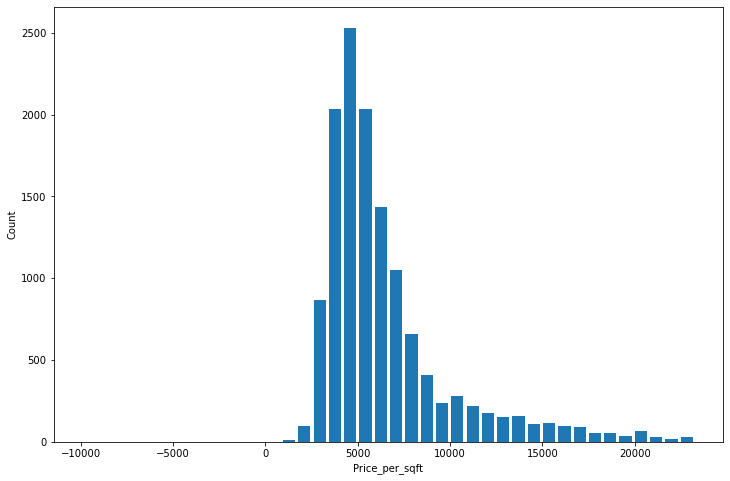

In [50]:
plt.rcParams['figure.figsize'] = (12,8)
plt.hist(df_std.price_per_sqft, bins=40, rwidth=0.8,range=(lower_limit,upper_limit) )
plt.xlabel('Price_per_sqft')
plt.ylabel('Count')

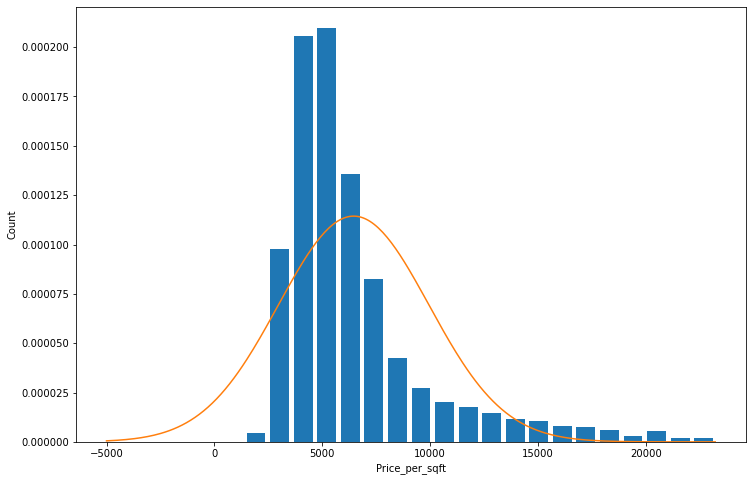

In [51]:
from scipy.stats import norm
import numpy as np

plt.hist(df_std.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Price_per_sqft')
plt.ylabel('Count')

rng = np.arange(-5000, df_std.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df_std.price_per_sqft.mean(),df_std.price_per_sqft.std()))

## Alternative way to do the same is by using Z-Score

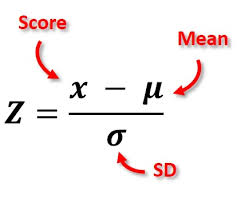

In [30]:
new_df['zscores'] = (new_df.price_per_sqft - new_df.price_per_sqft.mean()) / new_df.price_per_sqft.std()

In [31]:
new_df.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscores
10089,Electronic City Phase II,3 BHK,1220.0,3.0,35.25,3,2889,-0.911527
4733,Begur Road,3 BHK,1565.0,2.0,59.76,3,3818,-0.687187
3961,other,3 BHK,1630.0,2.0,97.78,3,5998,-0.160746
7371,Kanakpura Road,3 BHK,1223.0,2.0,42.81,3,3500,-0.763979
6591,Thanisandra,2 BHK,1039.0,2.0,39.50,2,3801,-0.691292


In [52]:
df_zscore = new_df[(new_df.zscores > -4) & (new_df.zscores < 4)]
df_zscore.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscores
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [54]:
df_zscore.price_per_sqft.describe()

count    13047.000000
mean      6449.328045
std       3487.670005
min       1379.000000
25%       4259.000000
50%       5415.000000
75%       7222.000000
max      23214.000000
Name: price_per_sqft, dtype: float64

In [55]:
new_df.shape[0]-df_zscore.shape[0]

125

# Removing Outliers using IQR

You are given height_weight.csv file which contains heights and weights of 1000 people. Dataset is taken from here, https://www.kaggle.com/mustafaali96/weight-height

You need to do this,

(1) Load this csv in pandas dataframe and first plot histograms for height and weight parameters

(2) Using IQR detect weight outliers and print them

(3) Using IQR, detect height outliers and print them

In [56]:
hdf = pd.read_csv('weight-height.csv')
hdf.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [75]:
hdf.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


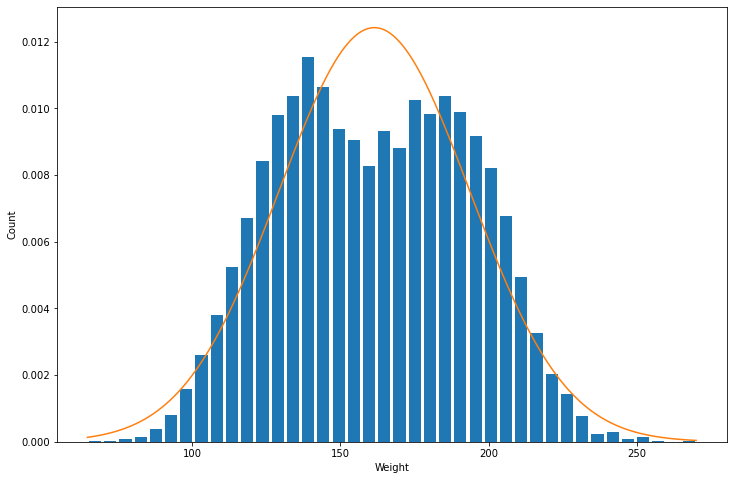

In [68]:
plt.hist(hdf.Weight, bins=40, rwidth=0.8, density=True)
plt.xlabel('Weight')
plt.ylabel('Count')

rng = np.arange(hdf.Weight.min(), hdf.Weight.max(), 0.1)
plt.plot(rng, norm.pdf(rng,hdf.Weight.mean(),hdf.Weight.std()))

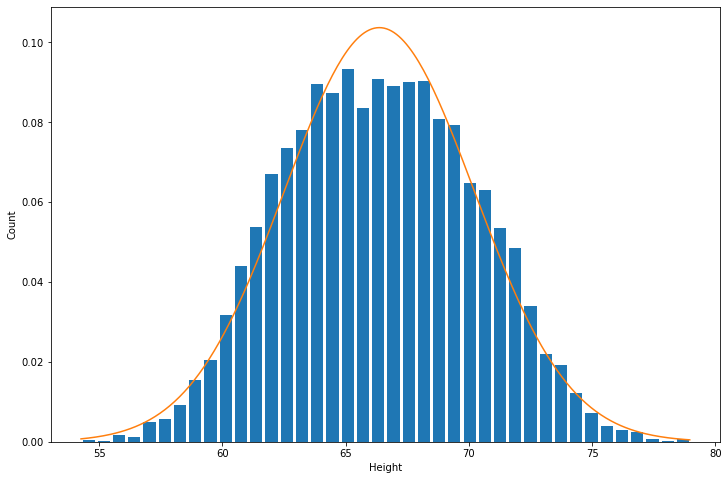

In [69]:
plt.hist(hdf.Height, bins=40, rwidth=0.8, density=True)
plt.xlabel('Height')
plt.ylabel('Count')

rng = np.arange(hdf.Height.min(), hdf.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,hdf.Height.mean(),hdf.Height.std()))

In [70]:
W_Q1 = hdf.Weight.quantile(0.25)
W_Q3 = hdf.Weight.quantile(0.75)
W_Q1, W_Q3

(135.8180513055015, 187.16952486868348)

In [71]:
W_IQR = W_Q3 - W_Q1
W_IQR

51.35147356318197

In [72]:
W_lower_limit = W_Q1 - 1.5*W_IQR
W_upper_limit = W_Q3 + 1.5*W_IQR
W_lower_limit, W_upper_limit

(58.79084096072856, 264.19673521345646)

In [73]:
weight_outliers = hdf[(hdf.Weight<W_lower_limit)|(hdf.Weight>W_upper_limit)]

In [74]:
weight_outliers

,Gender,Height,Weight
2014,Male,78.998742,269.989699


In [76]:
H_Q1 = hdf.Height.quantile(0.25)
H_Q3 = hdf.Height.quantile(0.75)
H_Q1, H_Q3

(63.505620481218955, 69.1742617268347)

In [77]:
H_IQR = H_Q3 - H_Q1
H_IQR

5.668641245615746

In [78]:
H_lower_limit = H_Q1 - 1.5*H_IQR
H_upper_limit = H_Q3 + 1.5*H_IQR
H_lower_limit, H_upper_limit

(55.00265861279534, 77.67722359525831)

In [79]:
Height_outliers = hdf[(hdf.Height<H_lower_limit)|(hdf.Height>H_upper_limit)]

In [80]:
Height_outliers

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127
